<ipython-input-5-8aff72035a97>:34: RuntimeWarning: divide by zero encountered in log
  mfshift = 20*np.log(np.abs(fshift))
<ipython-input-5-8aff72035a97>:38: RuntimeWarning: divide by zero encountered in log
  mifshift = 20*np.log(np.abs(ifshift))


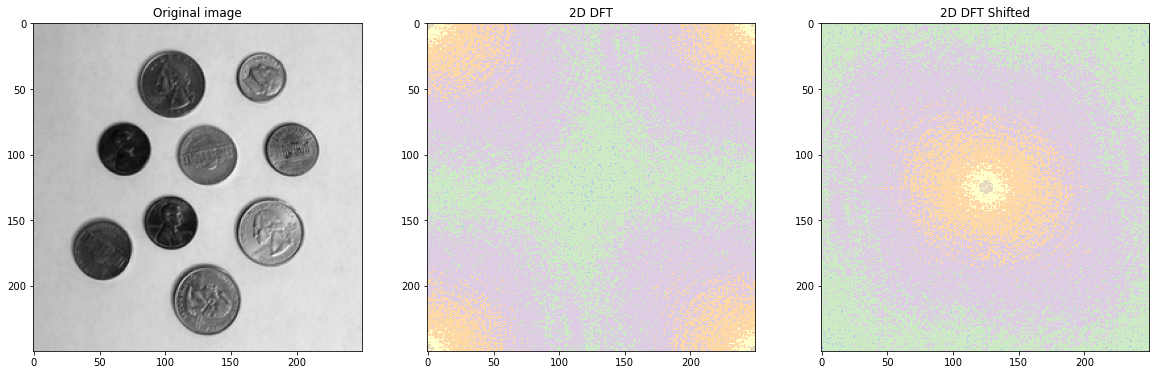

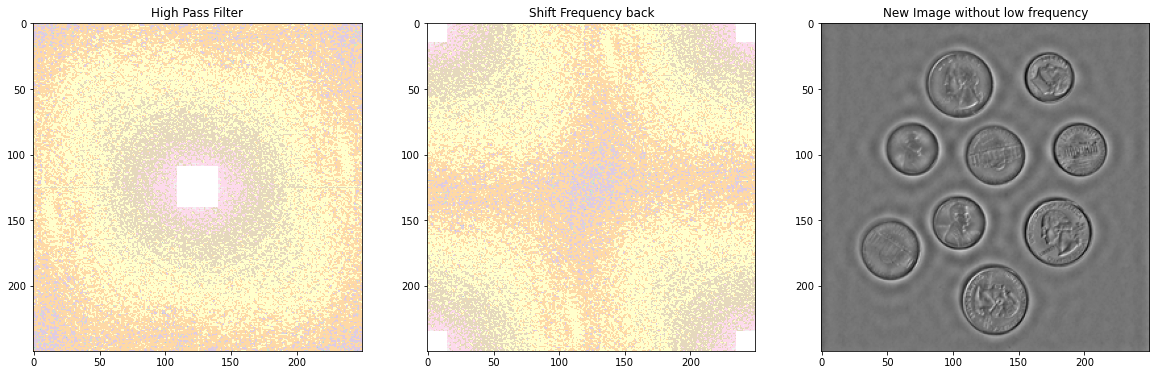

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Open image from path
path = r'images/coins.png'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Apply 2D DFT
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

#Extract the magnitude
mf = 20*np.log(np.abs(f))
mfshift = 20*np.log(np.abs(fshift))

#Plot image
fig = plt.figure(figsize=(20, 17))
ax1 = fig.add_subplot(1,3,1)
ax1.set(title='Original image')
ax1.imshow(image, cmap='gray')
ax2 = fig.add_subplot(1,3,2)
ax2.set(title='2D DFT')
ax2.imshow(mf, cmap='Pastel1')
ax3 = fig.add_subplot(1,3,3)
ax3.set(title='2D DFT Shifted')
ax3.imshow(mfshift, cmap='Pastel1')

#implement high pass filter
rows, cols = image.shape
cY, cX = rows//2, cols//2
fshift[cY-15:cY+15, cX-15:cX+15] = 0
mfshift = 20*np.log(np.abs(fshift))

#inverse DFT
ifshift = np.fft.ifftshift(fshift)
mifshift = 20*np.log(np.abs(ifshift))
new_image = np.fft.ifft2(ifshift)
new_image = np.real(new_image)

#Plot image
fig2 = plt.figure(figsize=(20, 17))
ax1 = fig2.add_subplot(1,3,1)
ax1.set(title='High Pass Filter')
ax1.imshow(mfshift, cmap='Pastel1')
ax2 = fig2.add_subplot(1,3,2)
ax2.set(title='Shift Frequency back')
ax2.imshow(mifshift, cmap='Pastel1')
ax3 = fig2.add_subplot(1,3,3)
ax3.set(title='New Image without low frequency')
ax3.imshow(new_image, cmap='gray')